In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('emails.csv')
df.sample(10)

,text,spam
1902,"Subject: mix , rip and burn like a pro . downl...",1
228,Subject: congratulations the free lotto compa...,1
1272,Subject: cme and catex - - - - - - - - - - - ...,0
5959,Subject: re : molecular electronics corp . wor...,0
1109,"Subject: course outlines jeff , i am sending...",0
5604,Subject: re : alpbacher finanzsymposium 2000 -...,0
980,"Subject: mba career opportunity shirley , pl...",0
6127,"Subject: weather course vince , ? we just w...",0
5420,"Subject: re : sharad update hi kate , firstl...",0
5136,"Subject: re : d - g energy laine , i can ini...",0


**Exploring Dataset**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6378 non-null   object
 1   spam    6378 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.8+ KB


In [50]:
ham = df[df['spam']==0]
ham

,text,spam
822,Subject: give your pc a tune - up with system ...,0
823,Subject: re : storage model : simple issues b...,0
824,Subject: credit support value for mg and paper...,0
825,"Subject: energy finance critiques david , he...",0
826,Subject: technical analysis more fallout - -...,0
...,...,...
6373,Subject: re : research and development charges...,0
6374,"Subject: re : receipts from visit jim , than...",0
6375,Subject: re : enron case study update wow ! a...,0
6376,"Subject: re : interest david , please , call...",0


In [51]:
spam = df[df['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
2013,Subject: are you ready to get it ? hello ! v...,1
2014,Subject: would you like a $ 250 gas card ? do...,1
2015,"Subject: immediate reply needed dear sir , i...",1
2016,Subject: wanna see me get fisted ? fist bang...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


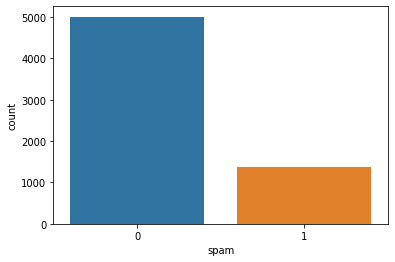

In [52]:
sns.countplot(df['spam'])

- `CountVectorizer Example`


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

sample = ['This is the first document.','This document is the second document','And this is the third document.']

vect.fit(sample)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [54]:
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'second': 4,
 'the': 5,
 'third': 6,
 'this': 7}

In [55]:
vect.get_feature_names()

['and', 'document', 'first', 'is', 'second', 'the', 'third', 'this']

In [56]:
sample = vect.transform(sample)

In [57]:
sample.toarray()

array([[0, 1, 1, 1, 0, 1, 0, 1],
       [0, 2, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1]])

**Data Preprocessing**

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spam_countvectorizer = vectorizer.fit_transform(df['text'])

In [59]:
type(spam_countvectorizer)

scipy.sparse.csr.csr_matrix

In [60]:
spam_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
spam_countvectorizer.shape

(6378, 37305)

In [62]:
vectorizer.vocabulary_

{'subject': 32373,
 'naturally': 23382,
 'irresistible': 18839,
 'your': 37026,
 'corporate': 10046,
 'identity': 17689,
 'lt': 21149,
 'is': 18849,
 'really': 28020,
 'hard': 16656,
 'to': 33800,
 'recollect': 28144,
 'company': 9282,
 'the': 33452,
 'market': 21666,
 'full': 15416,
 'of': 24275,
 'suqgestions': 32637,
 'and': 4837,
 'information': 18235,
 'isoverwhelminq': 18886,
 'but': 7547,
 'good': 16073,
 'catchy': 8044,
 'logo': 20961,
 'stylish': 32354,
 'statlonery': 32003,
 'outstanding': 24872,
 'website': 36082,
 'will': 36375,
 'make': 21441,
 'task': 33070,
 'much': 23053,
 'easier': 12611,
 'we': 36021,
 'do': 12049,
 'not': 23938,
 'promise': 27137,
 'that': 33443,
 'havinq': 16766,
 'ordered': 24633,
 'iogo': 18760,
 'automaticaily': 5773,
 'become': 6297,
 'world': 36635,
 'ieader': 17707,
 'it': 18914,
 'isguite': 18864,
 'ciear': 8652,
 'without': 36501,
 'products': 27035,
 'effective': 12814,
 'business': 7530,
 'organization': 24671,
 'practicable': 26621,
 'aim

In [63]:
x = spam_countvectorizer.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
y = df['spam']
y

0       1
1       1
2       1
3       1
4       1
       ..
6373    0
6374    0
6375    0
6376    0
6377    0
Name: spam, Length: 6378, dtype: int64

**Model Training**

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [66]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Prediction**

In [67]:
y_pred = nbc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

**Evaluation**

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

Accuracy:  96.55172413793103


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1266
           1       0.96      0.87      0.91       329

    accuracy                           0.97      1595
   macro avg       0.96      0.93      0.95      1595
weighted avg       0.97      0.97      0.96      1595



**Testing**

In [70]:
testing_sample = ['Hi Kin, do you have a charger?', 'Free money!!!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [71]:
nbc.predict(testing_sample_countvectorizer.toarray())

array([0, 1])